# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (50000, 1))

In [2]:
# Get class names (I could not retrieve them from the dataset directly)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (50000, 1))

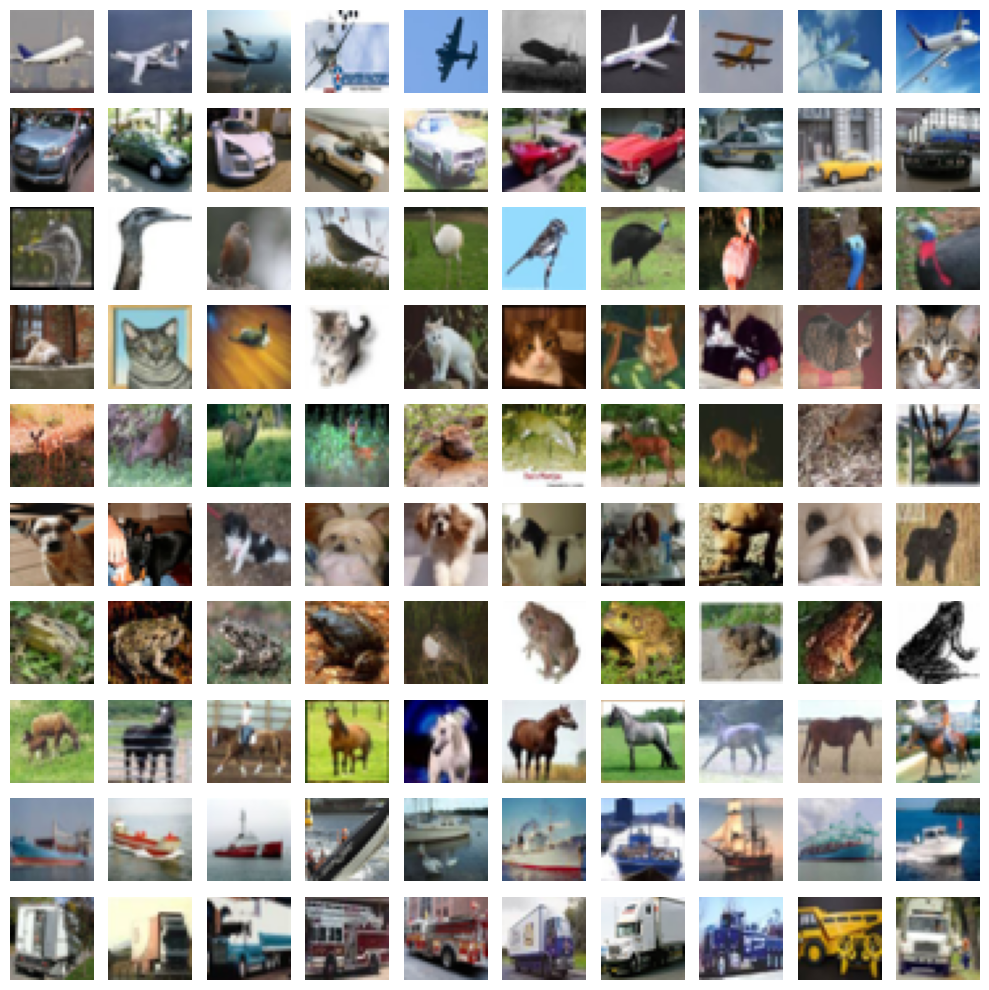

In [4]:
# Your code here :
# Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.

def plot_random_images(x_data, y_data, num_images=10, image_size=(1, 1)):

    num_categories = len(class_names)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_categories, num_images, figsize=(num_images * image_size[0], num_categories * image_size[1]))

    # Loop through each category
    for i in range(num_categories):

        # Find indices of images belonging to the current category
        indices = np.where(y_data == i)[0]

        # Randomly choose 'num_images' indices
        chosen_indices = np.random.choice(indices, num_images, replace=False)

        # Loop through and plot the images
        for j, index in enumerate(chosen_indices):
            axes[i, j].imshow(x_data[index], cmap='gray')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()


plot_random_images(x_train, y_train)



In [5]:
# Convert the labels to one-hot encoded form.
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape, y_test.shape)
y_train[:10]


(50000, 10) (10000, 10)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [6]:
# Normalize the images
# color channels should be normalized (0-255) to (0-1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [7]:
from keras.backend import clear_session
clear_session()

In [13]:
# Your code here :
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

input_shape = (x_train.shape[1:])

model1 = Sequential()
model1.add(Input(shape=input_shape))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [30]:
# Your code here :
# compile model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history1 = model1.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6168 - loss: 1.1197 - val_accuracy: 0.5974 - val_loss: 1.1871
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6134 - loss: 1.1226 - val_accuracy: 0.6010 - val_loss: 1.1910
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6183 - loss: 1.1073 - val_accuracy: 0.5990 - val_loss: 1.1681
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6159 - loss: 1.1052 - val_accuracy: 0.5984 - val_loss: 1.1661
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6202 - loss: 1.1057 - val_accuracy: 0.6036 - val_loss: 1.1695
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6220 - loss: 1.0919 - val_accuracy: 0.5884 - val_loss: 1.2015
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6207 - loss: 1.0971 - val_accuracy: 0.5998 - val_loss: 1.1853
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6274 - loss: 1.0795 - val_accuracy: 0.5716 - va

*   Plot the cross entropy loss curve and the accuracy curve

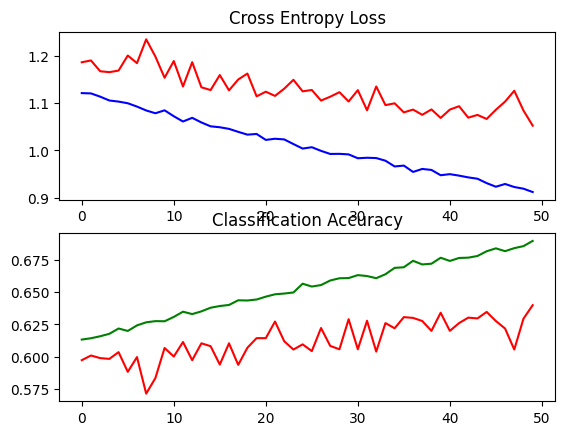

In [31]:
# Your code here :
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='green', label='train')
plt.plot(history1.history['val_accuracy'], color='red', label='val')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [32]:
from keras.backend import clear_session
clear_session()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.1862 - loss: 2.2948 - val_accuracy: 0.2750 - val_loss: 2.0757
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2939 - loss: 2.0081 - val_accuracy: 0.3226 - val_loss: 1.9121
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3244 - loss: 1.9120 - val_accuracy: 0.3486 - val_loss: 1.8302
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3683 - loss: 1.8035 - val_accuracy: 0.3770 - val_loss: 1.7469
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3830 - loss: 1.7486 - val_accuracy: 0.4008 - val_loss: 1.6936
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4088 - loss: 1.6806 - val_accuracy: 0.4216 - val_loss: 1.6557
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4183 - loss: 1.6517 - val_accuracy: 0.4220 - val_loss: 1.6475
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4359 - loss: 1.5980 - val_accuracy: 0.422

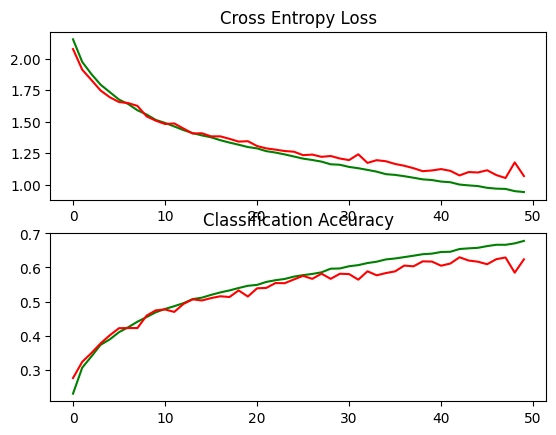

In [33]:
# Your code here :

# build model
input_shape = x_train.shape[1:]

model2 = Sequential()
model2.add(Input(shape=input_shape))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model2.add(MaxPool2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

print(model2.summary())

# compile model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history2 = model2.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

# plot results
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='green', label='train')
plt.plot(history2.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='green', label='train')
plt.plot(history2.history['val_accuracy'], color='red', label='val')
plt.show()

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


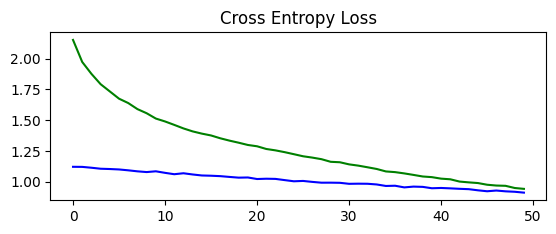

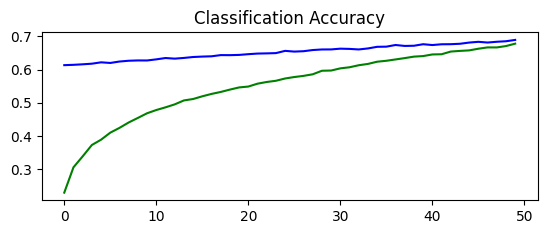

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6307 - loss: 1.0553
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6187 - loss: 1.0881
Model1 loss/accuracy: 1.0626180171966553 0.6323999762535095
Model2 loss/accuracy: 1.0949950218200684 0.6151999831199646


In [36]:
# Your code here
# Let's plot the first model's results in blue and the improved model in green
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history2.history['loss'], color='green', label='train')
plt.show()

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['accuracy'], color='green', label='train')
plt.show()

test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print('Model1 loss/accuracy:', test_loss1, test_acc1)
print('Model2 loss/accuracy:', test_loss2, test_acc2)

**Comment on the observation**

*(Double-click or enter to edit)*

I don't see any major improvement, both models converge to a similar loss and accuracy over 50 epochs

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[717  36  73  24   3   4  30  17  61  35]
 [ 32 786  16  13   1   4  22   8  25  93]
 [ 78  11 541  63  44  53 131  59  12   8]
 [ 21  14 104 461  27 127 171  42  12  21]
 [ 35   4 195  85 342  35 185 103  11   5]
 [ 21   3 110 215  24 448  91  70  11   7]
 [  4   7  59  53  10  13 829  16   3   6]
 [ 19   4  58  60  28  58  34 715   6  18]
 [118  64  21  24   2   9  18   7 700  37]
 [ 57 167  25  28   2  10  40  32  26 613]]



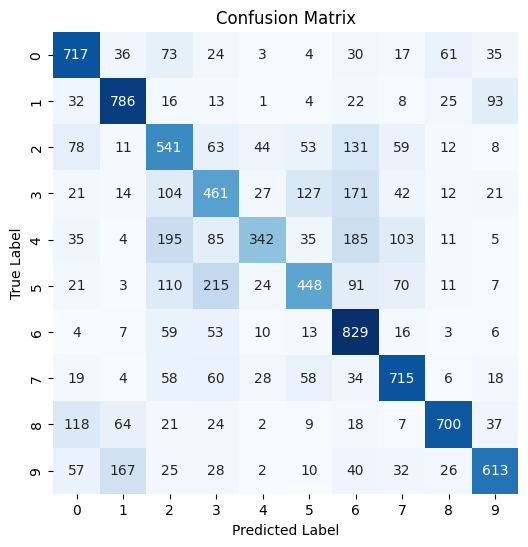

In [57]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns

# make predictions
y_pred2 = model2.predict(x_test)
y_pred2 = np.argmax(y_pred2, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

# confusion matrix
cm2 = confusion_matrix(y_test_labels, y_pred2)
print(cm2)
print()

# plot cm
plt.figure(figsize=(6, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)  # `annot=True` adds the values, `fmt='d'` formats them as integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



**Comment here :**

- The confusion matrix shows a distribution mainly on the diagonal, indicating good performance for those classes, on classes 0, 1, 6 and 7 for instance.

- Classes 8 and 9 show significant misclassifications, meaning that these 2 classes may have similar features. Considering that it's classes ship and truck, this makes sense, as both are vehiclues with similar visual features.

- The same can be observed between classes 2 (birds) and 4 (deer)

- Overall, some classes like 3 (cats) seem to be confused with many other classes, especially animals, indicating that the model is not complex enough to capture distinctive features for this class.

...

*    Print the test accuracy for the trained model.

In [58]:
# Your code here :
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print('Model2 loss/accuracy:', test_loss2, test_acc2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6187 - loss: 1.0881
Model2 loss/accuracy: 1.0949950218200684 0.6151999831199646


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [9]:
# Your code here :
import cv2

# resize sets
def resize_images(images, new_size=(64, 64)):
    resized_images = np.array([cv2.resize(image, new_size) for image in images])
    return resized_images

# Upscale train and test images
x_train_res = resize_images(x_train, (64, 64))
x_test_res = resize_images(x_test, (64, 64))

In [14]:
# build model
input_shape = x_train_res.shape[1:]  # (64, 64, 3)

model3 = Sequential()
model3.add(Input(shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

print(model3.summary())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

None


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [15]:
# Your code here :
# compile model
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history3 = model3.fit(x_train_res, y_train, batch_size=512, epochs=10, validation_split=0.1)



Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 113s 902ms/step - accuracy: 0.1927 - loss: 2.2591 - val_accuracy: 0.2398 - val_loss: 2.1341
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 60s 340ms/step - accuracy: 0.3097 - loss: 1.9814 - val_accuracy: 0.3974 - val_loss: 1.7540
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 340ms/step - accuracy: 0.3784 - loss: 1.7725 - val_accuracy: 0.3804 - val_loss: 1.7517
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 342ms/step - accuracy: 0.4156 - loss: 1.6458 - val_accuracy: 0.4272 - val_loss: 1.6289
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - accuracy: 0.4461 - loss: 1.5584 - val_accuracy: 0.4918 - val_loss: 1.4417
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.4776 - loss: 1.4743 - val_accuracy: 0.4678 - val_loss: 1.5039
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 340ms/step - accuracy: 0.4953 - loss: 1.4267 - val_accuracy: 0.4984 - val_loss: 1.4165
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 341ms/step - accuracy: 0.5205 - loss: 1.3643 - val_acc

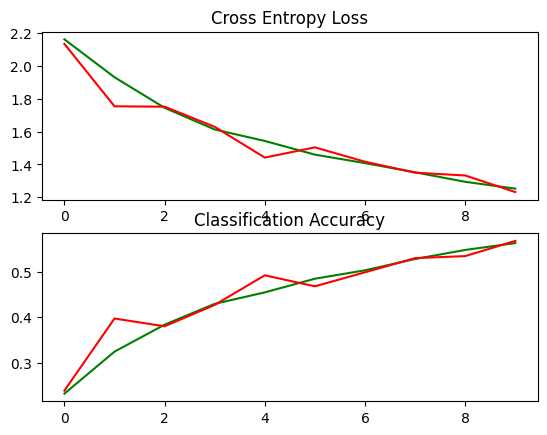

In [18]:
# plot results
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history3.history['loss'], color='green', label='train')
plt.plot(history3.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='green', label='train')
plt.plot(history3.history['val_accuracy'], color='red', label='val')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[655  40  24  31  10  11  10  17 144  58]
 [ 30 714   5  19   4   2   6  11  61 148]
 [102  26 303 157  94 115  44  93  34  32]
 [ 35  28  27 529  38 190  30  52  26  45]
 [ 48  14  63 133 403  93  43 144  34  25]
 [ 17   9  42 270  29 484  13  88  22  26]
 [ 15  22  32 210  81  60 488  37  19  36]
 [ 24  10  23  92  34  71   4 677  10  55]
 [ 86  65   5  27   3   6   1  12 739  56]
 [ 29 165   9  28   2  10   5  23  69 660]]



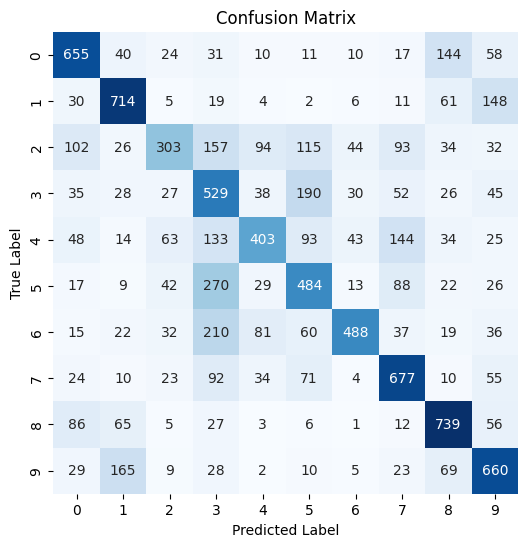

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5697 - loss: 1.2364
Model2 loss/accuracy: 1.2399632930755615 0.5651999711990356


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# make predictions
y_pred3 = model3.predict(x_test_res)
y_pred3 = np.argmax(y_pred3, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

# confusion matrix
cm3 = confusion_matrix(y_test_labels, y_pred3)
print(cm3)
print()

# plot cm
plt.figure(figsize=(6, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False)  # `annot=True` adds the values, `fmt='d'` formats them as integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# evaluate model
test_loss3, test_acc3 = model3.evaluate(x_test_res, y_test)
print('Model2 loss/accuracy:', test_loss3, test_acc3)

We get similar results and class confusions as the previous model. Looking at the curves, this is mainly due to the number of epochs, which is way too low for such a complex model. We should run it again with 50 epochs to see an improvements.

In [25]:
from keras.backend import clear_session
clear_session()

In [10]:
# Let's try to train the same model for longer
# I will add batch normalisation, a dropout layer and implement EarlyStopping to avoid overfitting
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_shape = x_train_res.shape[1:]  # (64, 64, 3)

model4 = Sequential()
model4.add(Input(shape=input_shape))
model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.50))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.50))
model4.add(Dense(10, activation='softmax'))

print(model4.summary())



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,346,122 (20.39 MB)

 Trainable params: 5,344,330 (20.39 MB)

 Non-trainable params: 1,792 (7.00 KB)

None


In [11]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# compile model
opt = Adam(learning_rate=0.0001)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history4 = model4.fit(
    x_train_res, y_train,
    batch_size=512,
    epochs=50,
    validation_split=0.1,
    callbacks = [early_stopping]
)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1950 - loss: 2.8196 - val_accuracy: 0.0950 - val_loss: 5.2799
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 35s 403ms/step - accuracy: 0.3346 - loss: 1.8335 - val_accuracy: 0.0950 - val_loss: 7.4343
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 405ms/step - accuracy: 0.4042 - loss: 1.6397 - val_accuracy: 0.1084 - val_loss: 5.9424
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 401ms/step - accuracy: 0.4569 - loss: 1.5227 - val_accuracy: 0.1300 - val_loss: 4.3014
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 403ms/step - accuracy: 0.4831 - loss: 1.4420 - val_accuracy: 0.1838 - val_loss: 3.5470
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 402ms/step - accuracy: 0.5159 - loss: 1.3561 - val_accuracy: 0.2434 - val_loss: 2.9600
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 403ms/step - accuracy: 0.5375 - loss: 1.2947 - val_accuracy: 0.3620 - val_loss: 2.1609
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 35s 402ms/step - accuracy: 0.5586 - loss: 1.2324 - val_accura

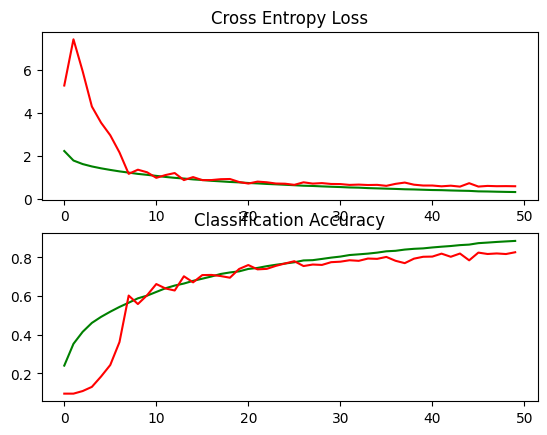

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[774  15  45  16  19   1  12   5  87  26]
 [  8 893   2   1   4   2   8   1  28  53]
 [ 38   3 747  33  73  28  51  12  12   3]
 [ 10   5  61 679  51  94  66  14  16   4]
 [  7   1  52  33 838  15  27  17   9   1]
 [  4   1  49 211  49 638  19  20   8   1]
 [  4   2  30  29  21   4 907   1   2   0]
 [  6   2  40  38  72  45   5 785   2   5]
 [ 16  11   5   4   6   1   7   2 943   5]
 [ 22  45   4   9   6   1   4   5  29 875]]



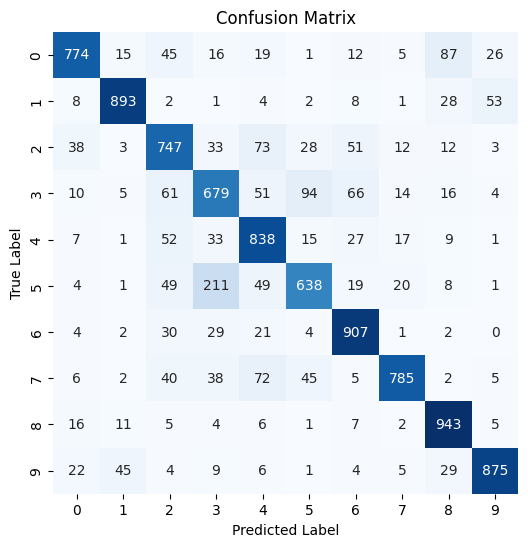

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8090 - loss: 0.6015
Model2 loss/accuracy: 0.6051654815673828 0.8079000115394592


In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# plot training results
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history4.history['loss'], color='green', label='train')
plt.plot(history4.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history4.history['accuracy'], color='green', label='train')
plt.plot(history4.history['val_accuracy'], color='red', label='val')
plt.show()

# make predictions
y_pred4 = model4.predict(x_test_res)
y_pred4 = np.argmax(y_pred4, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

# confusion matrix
cm4 = confusion_matrix(y_test_labels, y_pred4)
print(cm4)
print()

# plot cm
plt.figure(figsize=(6, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False)  # `annot=True` adds the values, `fmt='d'` formats them as integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# evaluate model
test_loss4, test_acc4 = model4.evaluate(x_test_res, y_test)
print('Model2 loss/accuracy:', test_loss4, test_acc4)

This improved version of the model shows some drastic improvements, with an accuracy reaching 0.80. However, we can see on the plots that it starts overfitting slightly around batch 30. We should play with hyperparameters and learning rate to reduce the overfitting and train for longer so it gets more time to stabilize.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Activation fonctions introduce non-linearity (like most features that can be observed in nature), enabling neural networks to learn complex patterns in the input data.
_

2 - Key Differences between sigmoid and softmax:
Sigmoid outputs a probablility for binary classification, while softmax provides a probability distribution for multi-class classification.
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Categorical crossentropy is used for multi-classification, while binary crossentropy is used for binary classification.



_
